# Stock market price for Tesla

## Documentation of the researcher for the most suited algorithm for the specified use case.

For stock price prediction on the closing price regression algorithm is suited. 
How evver if the goal is to predicts whether the closing price of stock will increase or decrease the next day classification is best suited.

In this case the goal is to predict the closing price for one specific date so therefore the regression algorithm is best suited in this case.

Source: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9154061&isnumber=9153968

### stepps preformed To Train the algorithem en get a model

In [1]:
#imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
#read the file
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [5]:
df.shape

(2845, 7)

In [6]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] =  df['Date'].map(dt.datetime.toordinal)

In [7]:
# Keep only the 'Close' Value' ,'Date' and the index
df = df[['Date','Close']]

In [8]:
df.head()

,Date,Close
0,733952,4.778
1,733953,4.766
2,733954,4.392
3,733955,3.840
4,733959,3.222


Text(0, 0.5, 'close price USD ($)')

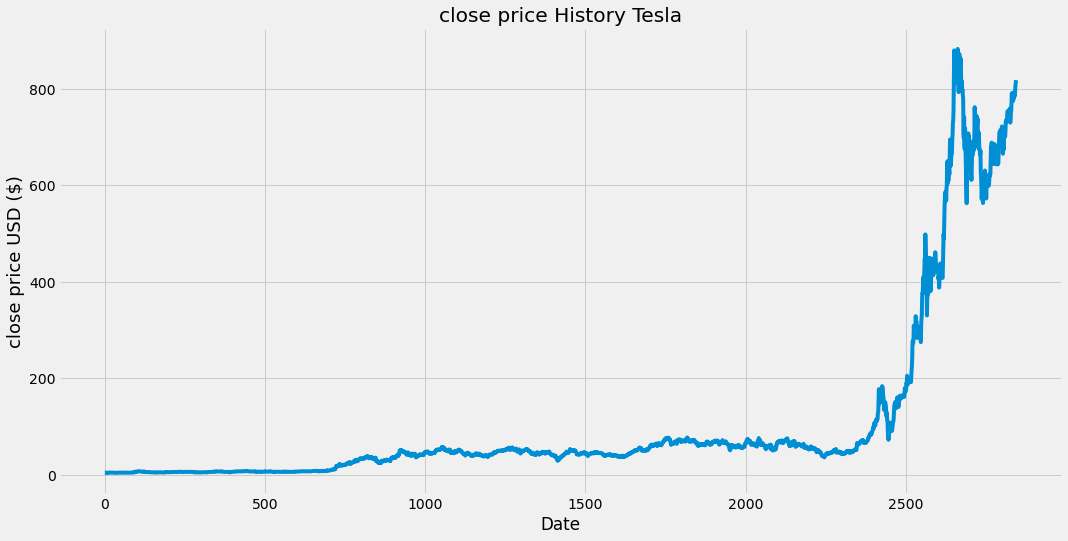

In [9]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('close price History Tesla')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('close price USD ($)', fontsize=18)

In [10]:
df.values

array([[7.33952000e+05, 4.77800000e+00],
       [7.33953000e+05, 4.76600000e+00],
       [7.33954000e+05, 4.39200000e+00],
       ...,
       [7.38075000e+05, 8.05719971e+02],
       [7.38076000e+05, 8.11080017e+02],
       [7.38077000e+05, 8.18320007e+02]])

In [11]:
X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])
# splitt the set in traing and testing set
#test_size = 0.33 tell the function that 1/3 of valuess should beput in test arrey
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:

#Now lets train a algorithem
DTR = DecisionTreeRegressor()#definerer algoritmen og som object i variabelen regression
DTR.fit(X_train, y_train) #train
Y_pred = DTR.predict(X_train)#make prediction

In [13]:
print("MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

MSE = 0.0


In [14]:
#make prediction on test data
Y_pred = DTR.predict(X_test)#make prediction on X_test

In [15]:
##Calculate MSE on the for the preformnc on test data
print("MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

MSE = 49.170997502440784


In [16]:
#prepper to save the models
#models = []

In [17]:
#function to save the model
#import pickle
#save the model to disk
#filename = 'model.sav'
#pickle.dump(modells[0], oppen(filename, 'wb'))

########################################
#load the model again, and test to se if it works.
#loade_model = pickle.load(oppen(filename, 'rb'))
#loade_model.predict([[]]) #toordinal